<a href="https://www.kaggle.com/code/lalit7881/smart-spoilage-prediction-system-94-71?scriptVersionId=296661297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/perishable-goods-management/perishable_goods_management.csv


##  Perishable Goods Management

Perishable Goods Management focuses on the efficient handling, storage, tracking, and distribution of time-sensitive products such as food, pharmaceuticals, and agricultural produce. The goal is to maintain product quality, safety, and freshness throughout the entire supply chain while minimizing waste and financial losses.

This system ensures proper inventory control by monitoring expiry dates, storage conditions, and stock movement in real time. It helps organizations optimize cold-chain logistics, reduce spoilage, and comply with safety and regulatory standards. By leveraging data-driven insights, businesses can improve demand forecasting, streamline operations, and ensure timely delivery of high-quality products to customers.

Effective perishable goods management not only enhances operational efficiency but also builds customer trust by consistently delivering safe, fresh, and reliable products while supporting sustainability through waste reduction.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/perishable-goods-management/perishable_goods_management.csv")

In [3]:
df.head()

,record_id,product_id,product_name,category,store_id,region,supplier_id,transaction_date,expiration_date,shelf_life_days,...,selling_price,units_sold,units_wasted,waste_pct,revenue,waste_cost,profit,profit_margin_pct,supplier_score,is_promoted
0,1,BAK_DON_743,Donuts,Bakery,STORE_046,West,SUPPLIER_03,2024-09-25,2024-09-29,4,...,2.60,138,20,12.7,358.80,24.40,166.04,46.3,9,0
1,2,MEA_SAU_338,Sausages,Meat,STORE_030,Southwest,SUPPLIER_12,2023-04-14,2023-04-21,9,...,8.25,251,102,28.9,2070.75,426.36,595.21,28.7,6,0
2,3,BAK_BAG_799,Bagels,Bakery,STORE_035,Midwest,SUPPLIER_08,2024-10-25,2024-10-27,2,...,1.28,483,0,0.0,618.24,0.00,-405.72,-65.6,9,0
3,4,PHA_VAC_801,Vaccines,Pharmaceuticals,STORE_003,Midwest,SUPPLIER_11,2023-11-29,2024-02-17,87,...,209.56,477,0,0.0,99960.12,0.00,57988.89,58.0,6,0
4,5,REA_FRE_422,Fresh Pasta,Ready_to_Eat,STORE_042,West,SUPPLIER_15,2023-08-06,2023-08-09,4,...,5.28,391,0,0.0,2064.48,0.00,879.75,42.6,6,0


In [4]:
df.tail()

,record_id,product_id,product_name,category,store_id,region,supplier_id,transaction_date,expiration_date,shelf_life_days,...,selling_price,units_sold,units_wasted,waste_pct,revenue,waste_cost,profit,profit_margin_pct,supplier_score,is_promoted
99995,99996,DEL_DIP_628,Dips,Deli,STORE_011,Southwest,SUPPLIER_05,2024-12-22,2024-12-27,5,...,12.10,149,0,0.0,1802.90,0.00,1063.86,59.0,10,0
99996,99997,FRO_FRO_538,Frozen Dinners,Frozen_Meals,STORE_031,Midwest,SUPPLIER_06,2023-11-28,2024-06-06,204,...,13.60,0,212,100.0,0.00,1392.84,-1392.84,0.0,8,0
99997,99998,MEA_CHI_709,Chicken,Meat,STORE_011,Southwest,SUPPLIER_19,2023-06-15,2023-06-21,9,...,12.28,264,208,44.1,3241.92,1312.48,263.60,8.1,10,1
99998,99999,PHA_EYE_545,Eye Drops,Pharmaceuticals,STORE_020,West,SUPPLIER_14,2024-12-14,2026-03-03,581,...,320.12,0,251,100.0,0.00,51919.35,-51919.35,0.0,6,0
99999,100000,FRO_FRO_484,Frozen Vegetables,Frozen_Meals,STORE_013,Northeast,SUPPLIER_17,2024-01-31,2024-07-11,210,...,5.72,139,60,30.2,795.08,187.20,174.20,21.9,9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   record_id                   100000 non-null  int64  
 1   product_id                  100000 non-null  object 
 2   product_name                100000 non-null  object 
 3   category                    100000 non-null  object 
 4   store_id                    100000 non-null  object 
 5   region                      100000 non-null  object 
 6   supplier_id                 100000 non-null  object 
 7   transaction_date            100000 non-null  object 
 8   expiration_date             100000 non-null  object 
 9   shelf_life_days             100000 non-null  int64  
 10  days_remaining_at_purchase  100000 non-null  int64  
 11  storage_temp                100000 non-null  float64
 12  temp_deviation              100000 non-null  float64
 13  base_price     

In [6]:
df.dtypes

record_id                       int64
product_id                     object
product_name                   object
category                       object
store_id                       object
region                         object
supplier_id                    object
transaction_date               object
expiration_date                object
shelf_life_days                 int64
days_remaining_at_purchase      int64
storage_temp                  float64
temp_deviation                float64
base_price                    float64
cost_price                    float64
initial_quantity                int64
spoilage_sensitivity          float64
day_of_week                     int64
is_weekend                      int64
month                           int64
daily_demand                    int64
demand_variability            float64
temp_abuse_events               int64
distribution_hours            float64
handling_score                  int64
packaging_score                 int64
spoilage_ris

In [7]:
df.shape

(100000, 42)

In [8]:
df.isnull().sum()

record_id                     0
product_id                    0
product_name                  0
category                      0
store_id                      0
region                        0
supplier_id                   0
transaction_date              0
expiration_date               0
shelf_life_days               0
days_remaining_at_purchase    0
storage_temp                  0
temp_deviation                0
base_price                    0
cost_price                    0
initial_quantity              0
spoilage_sensitivity          0
day_of_week                   0
is_weekend                    0
month                         0
daily_demand                  0
demand_variability            0
temp_abuse_events             0
distribution_hours            0
handling_score                0
packaging_score               0
spoilage_risk                 0
was_spoiled                   0
quality_grade                 0
days_until_expiry             0
markdown_applied              0
discount

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

record_id                     100000
product_id                     45301
product_name                      63
category                          10
store_id                          50
region                             5
supplier_id                       20
transaction_date                 731
expiration_date                 1332
shelf_life_days                  730
days_remaining_at_purchase       716
storage_temp                     476
temp_deviation                    84
base_price                     12846
cost_price                     10665
initial_quantity                 491
spoilage_sensitivity               9
day_of_week                        7
is_weekend                         2
month                             12
daily_demand                     845
demand_variability                41
temp_abuse_events                 11
distribution_hours               681
handling_score                     7
packaging_score                    6
spoilage_risk                    377
w

In [11]:
df.columns

Index(['record_id', 'product_id', 'product_name', 'category', 'store_id',
       'region', 'supplier_id', 'transaction_date', 'expiration_date',
       'shelf_life_days', 'days_remaining_at_purchase', 'storage_temp',
       'temp_deviation', 'base_price', 'cost_price', 'initial_quantity',
       'spoilage_sensitivity', 'day_of_week', 'is_weekend', 'month',
       'daily_demand', 'demand_variability', 'temp_abuse_events',
       'distribution_hours', 'handling_score', 'packaging_score',
       'spoilage_risk', 'was_spoiled', 'quality_grade', 'days_until_expiry',
       'markdown_applied', 'discount_pct', 'selling_price', 'units_sold',
       'units_wasted', 'waste_pct', 'revenue', 'waste_cost', 'profit',
       'profit_margin_pct', 'supplier_score', 'is_promoted'],
      dtype='object')

## Data visualizations

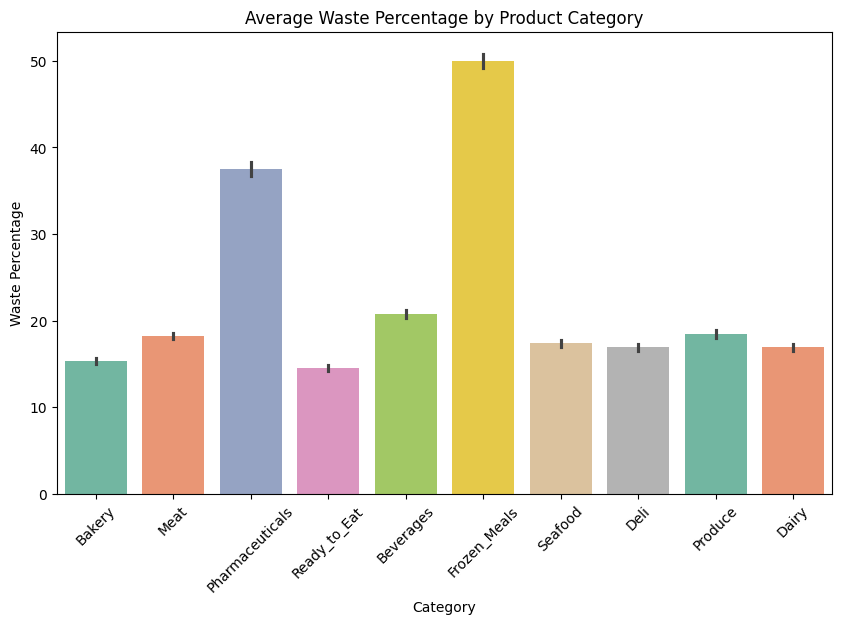

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='category',
    y='waste_pct',
    palette='Set2'
)
plt.title("Average Waste Percentage by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Waste Percentage")
plt.xlabel("Category")
plt.show()


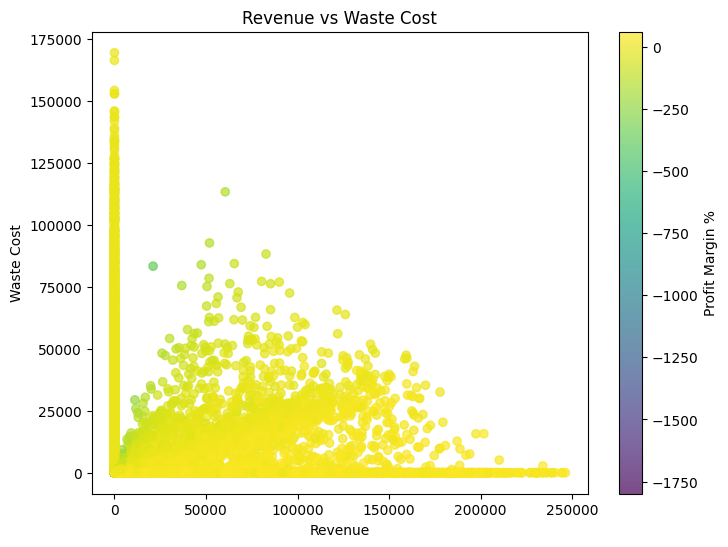

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['revenue'],
    df['waste_cost'],
    c=df['profit_margin_pct'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label="Profit Margin %")
plt.title("Revenue vs Waste Cost")
plt.xlabel("Revenue")
plt.ylabel("Waste Cost")
plt.show()


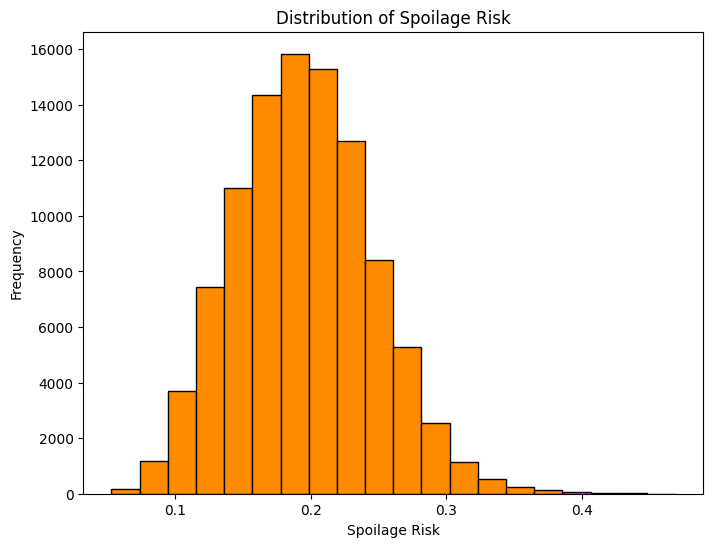

In [14]:
plt.figure(figsize=(8,6))
plt.hist(
    df['spoilage_risk'],
    bins=20,
    color='darkorange',
    edgecolor='black'
)
plt.title("Distribution of Spoilage Risk")
plt.xlabel("Spoilage Risk")
plt.ylabel("Frequency")
plt.show()


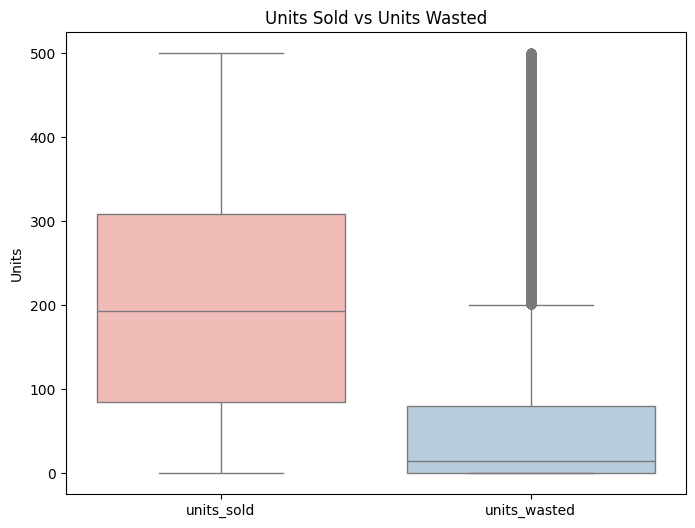

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df[['units_sold', 'units_wasted']],
    palette='Pastel1'
)
plt.title("Units Sold vs Units Wasted")
plt.ylabel("Units")
plt.show()


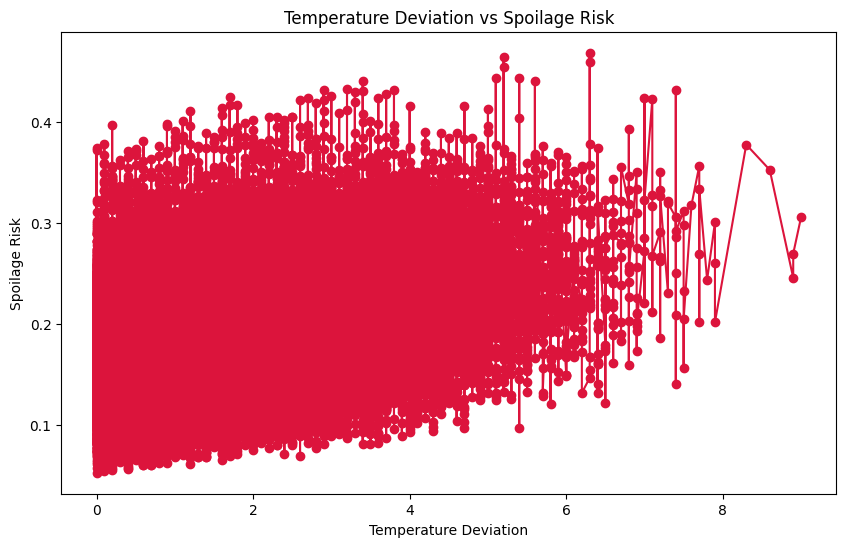

In [16]:
df_sorted = df.sort_values('temp_deviation')

plt.figure(figsize=(10,6))
plt.plot(
    df_sorted['temp_deviation'],
    df_sorted['spoilage_risk'],
    color='crimson',
    marker='o'
)
plt.title("Temperature Deviation vs Spoilage Risk")
plt.xlabel("Temperature Deviation")
plt.ylabel("Spoilage Risk")
plt.show()


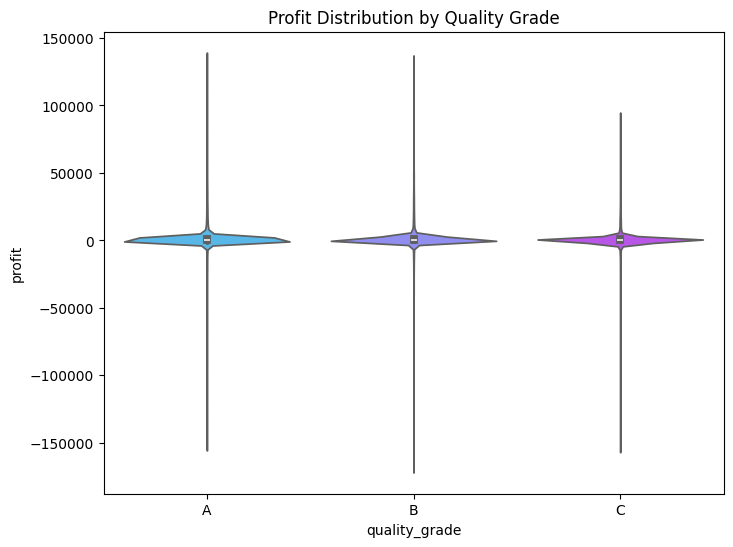

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x='quality_grade',
    y='profit',
    palette='cool'
)
plt.title("Profit Distribution by Quality Grade")
plt.show()


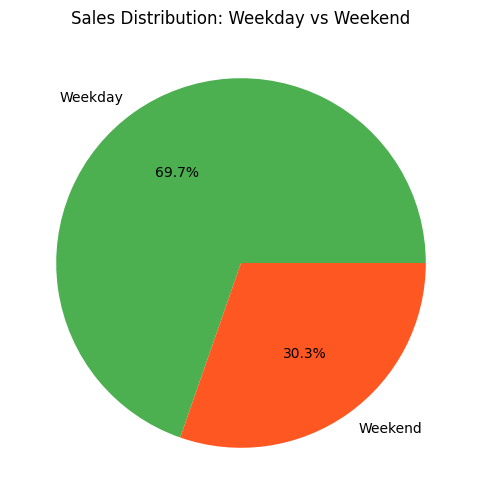

In [18]:
sales_split = df.groupby('is_weekend')['units_sold'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    sales_split,
    labels=['Weekday', 'Weekend'],
    autopct='%1.1f%%',
    colors=['#4CAF50', '#FF5722']
)
plt.title("Sales Distribution: Weekday vs Weekend")
plt.show()


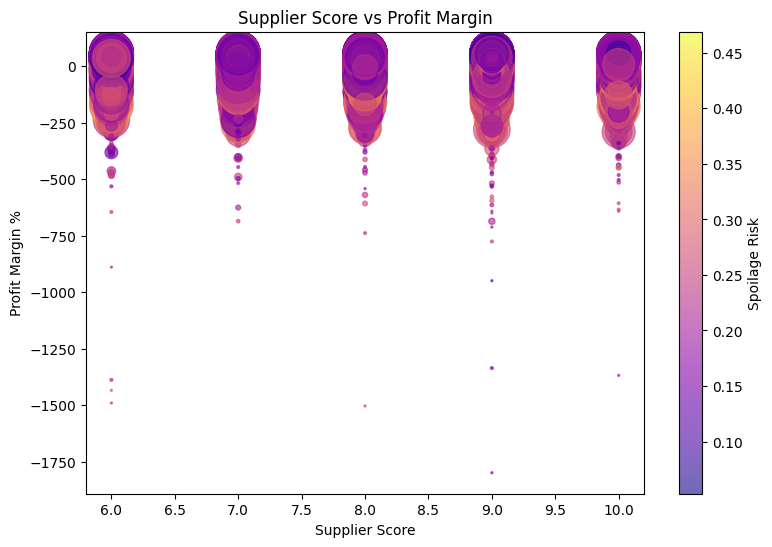

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(
    df['supplier_score'],
    df['profit_margin_pct'],
    s=df['units_sold'] * 2,
    alpha=0.6,
    c=df['spoilage_risk'],
    cmap='plasma'
)
plt.colorbar(label="Spoilage Risk")
plt.title("Supplier Score vs Profit Margin")
plt.xlabel("Supplier Score")
plt.ylabel("Profit Margin %")
plt.show()


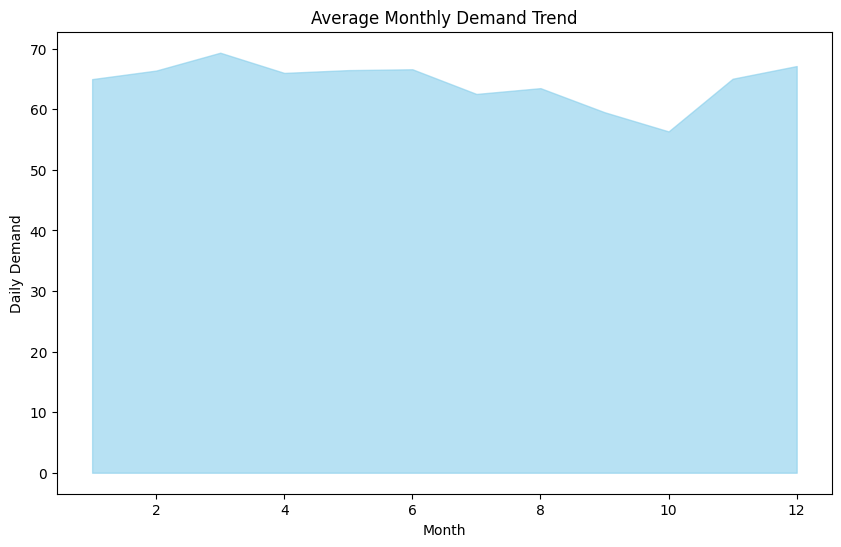

In [20]:
monthly_demand = df.groupby('month')['daily_demand'].mean()

plt.figure(figsize=(10,6))
plt.fill_between(
    monthly_demand.index,
    monthly_demand.values,
    color='skyblue',
    alpha=0.6
)
plt.title("Average Monthly Demand Trend")
plt.xlabel("Month")
plt.ylabel("Daily Demand")
plt.show()


## Feature engg

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
df.drop([
    'record_id',
    'product_name',
    'transaction_date',
    'expiration_date'
], axis=1, inplace=True)


In [23]:
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [24]:
X = df.drop('was_spoiled', axis=1)
y = df['was_spoiled']


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}


In [28]:
for model_name, model in models.items():

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Accuracy
    acc = accuracy_score(y_test, y_pred) * 100

    print(f"\n📌 {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.2f}%")



📌 Logistic Regression
Confusion Matrix:
[[15410   702]
 [ 3578   310]]
Accuracy: 78.60%

📌 Decision Tree
Confusion Matrix:
[[15181   931]
 [  804  3084]]
Accuracy: 91.33%

📌 Random Forest
Confusion Matrix:
[[15954   158]
 [  892  2996]]
Accuracy: 94.75%

📌 KNN
Confusion Matrix:
[[15149   963]
 [ 2523  1365]]
Accuracy: 82.57%

📌 SVM
Confusion Matrix:
[[15444   668]
 [ 1940  1948]]
Accuracy: 86.96%


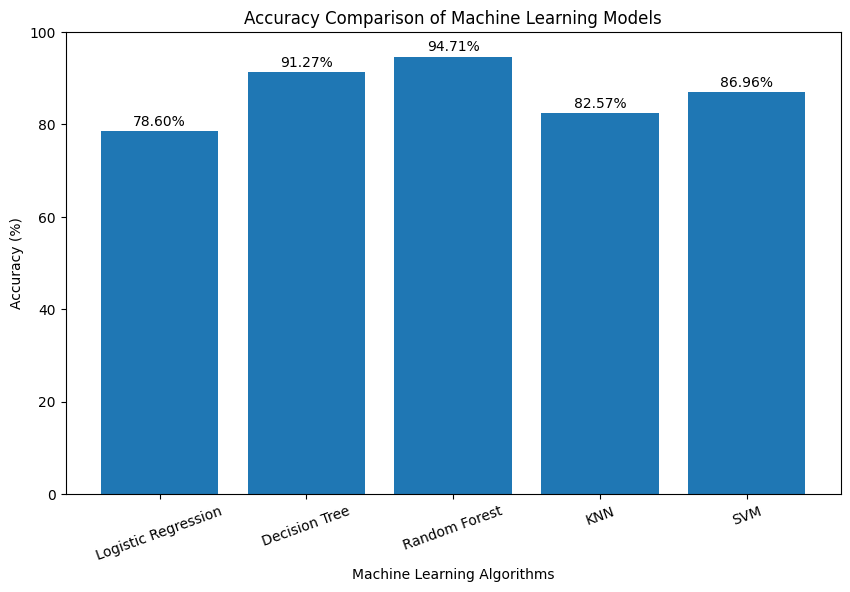

In [29]:
models = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'KNN',
    'SVM'
]

accuracies = [
    78.60,
    91.27,
    94.71,
    82.57,
    86.96
]

# Create bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

# Labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Machine Learning Models")
plt.ylim(0, 100)
plt.xticks(rotation=20)

plt.show()